## finale Simulation mit allen Funktionen

In diesem Notebook ist beschrieben, wie die Simulation final durchgeführt und ausgewertet werden kann. Das Simulations-Programm steht in dem python-file "model_final.py". Die zugehörigen Settings können vom User in der json "settings_final.json" eingestellt werden. Alternativ kann auch eine andere json beim Funktionsaufruf verwendet werden

In [1]:
import importlib
import numpy as np
import model_final
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

## Einfacher Simulationsdurchlauf
Im Folgenden ist ein einfacher Simulationsdurchlauf zu sehen. Es dazu wird das Simulationsprogramm aus der entsprechenden Python-Datei geladen und mit der entsprechenden Settings-Datei ausgeführt:

In [2]:
import model_final
importlib.reload(model_final)
df_results, anzahl_evs, anzahl_evs_abgewiesen = model_final.simulation("settings_final.json")


Anzahl geladener EVs:  30
Abgewiesene EVs:  0


## Auswertung des einfachen Durchlaufs
Es gibt verschiedene Wege den Simulationsdurchlauf auszuwerten. Unter anderem kann hierbei auf die Funktionen “plot” und “auswertung” in dem Python-File zurückgegriffen werden:

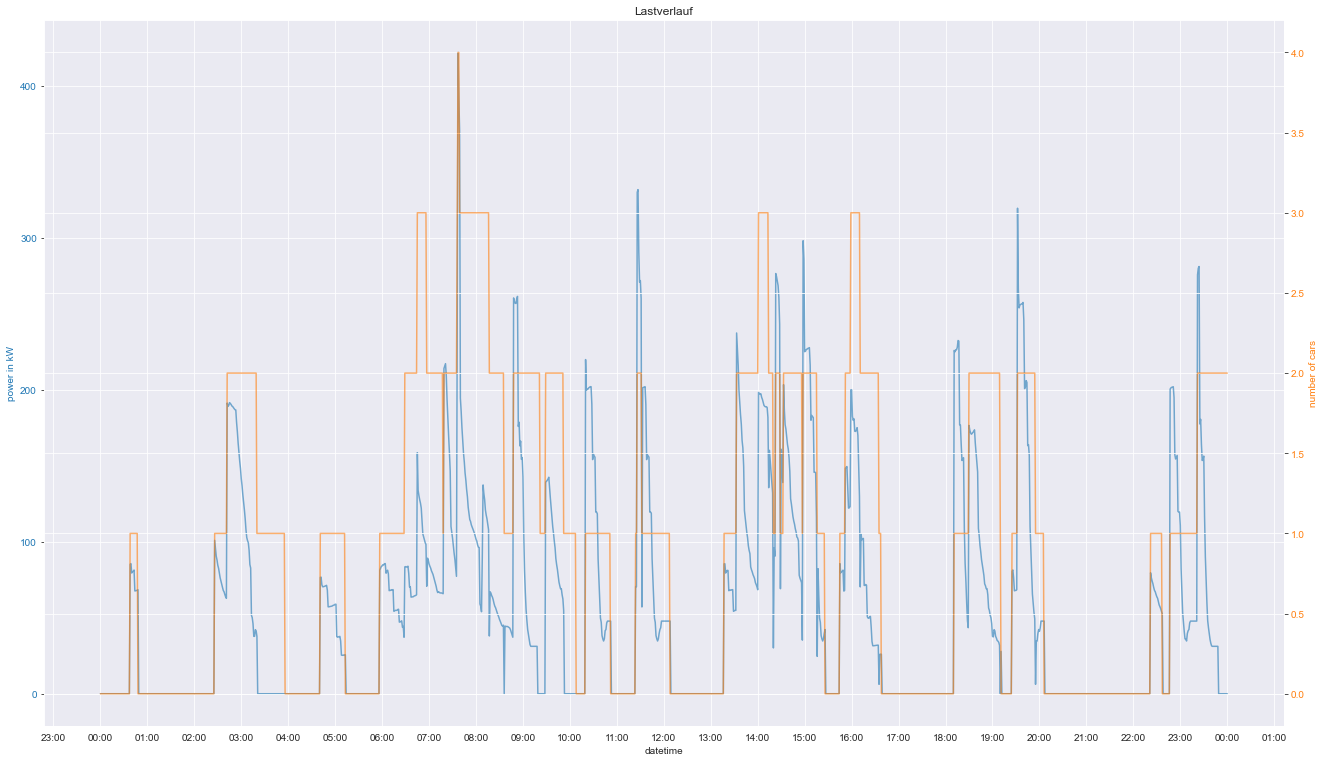

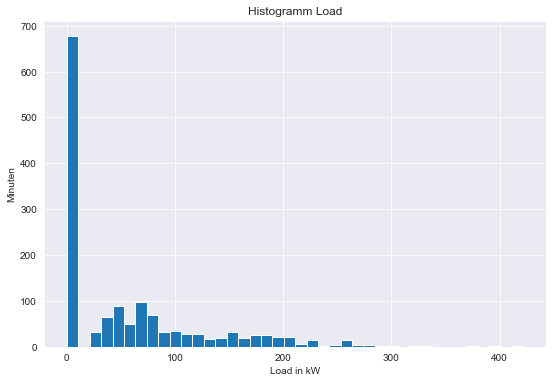

Maximale Last:  421.98522294332145 kWh
Minuten über 60% der maximalen Last (253.19 kWh): 33 Entsprechen  2.29 %
Minuten über 70% der maximalen Last (295.39 kWh): 7 Entsprechen  0.49 %
Minuten über 80% der maximalen Last (337.59 kWh): 3 Entsprechen  0.21 %
Minuten über 90% der maximalen Last (379.79 kWh): 2 Entsprechen  0.14 %
Minuten über 95% der maximalen Last (400.89 kWh): 1 Entsprechen  0.07 %


In [3]:
model_final.plot(df_results)
model_final.auswertung(df_results)

## Auswertung mit Pandas eigenen Boardmitteln
Dataframes können auf vielseitige Art und Weise ausgewertet werden. Exemplarisch wird hier der “describe”-Befehl für DataFrames genutzt:

In [4]:
df_results.describe()

,power_per_minute,number_cars_charging
count,1441.000000,1441.000000
mean,56.263054,0.956280
std,72.040886,0.956791
min,0.000000,0.000000
25%,0.000000,0.000000
50%,34.605999,1.000000
75%,84.793353,2.000000
max,421.985223,4.000000


## Mehrere Durchläufe

Um die Auswirkungen bestimmter Faktoren auf das Simulationsergebnis zu betrachten ist es sinnvoll, die Simulation über mehrere Tage hinweg zu betrachten. Anschließend kann die Last beispielsweise in einem Histogramm oder ECDF-Plot veranschaulicht werden. In diesem Beispiel wird über 100 Tage simuliert:

In [5]:
importlib.reload(model_final)

df_results_all_runs = pd.DataFrame()
df_results_single_row = pd.DataFrame()
anzahl_evs_gesamt = 0
anzahl_evs_abgewiesen_gesamt = 0

for i in range(100):
    importlib.reload(model_final)
    new_column_name = f'power_run_{i}'
    df_results_returned, anzahl_evs, anzahl_evs_abgewiesen = model_final.simulation("settings_final.json")
    df_results_all_runs[new_column_name] = df_results_returned.power_per_minute
    df_results_single_row = pd.concat([df_results_single_row, df_results_returned])
    anzahl_evs_gesamt = anzahl_evs_gesamt + anzahl_evs
    anzahl_evs_abgewiesen_gesamt = anzahl_evs_abgewiesen_gesamt + anzahl_evs_abgewiesen


print("Abgewiesene EVs gesamt: ", anzahl_evs_abgewiesen_gesamt)
print("Anzahl EVs gesamt: ", anzahl_evs_gesamt)

Anzahl geladener EVs:  26
Abgewiesene EVs:  1
Anzahl geladener EVs:  37
Abgewiesene EVs:  1
Anzahl geladener EVs:  30
Abgewiesene EVs:  0
Anzahl geladener EVs:  36
Abgewiesene EVs:  3
Anzahl geladener EVs:  42
Abgewiesene EVs:  5
Anzahl geladener EVs:  39
Abgewiesene EVs:  0
Anzahl geladener EVs:  25
Abgewiesene EVs:  0
Anzahl geladener EVs:  38
Abgewiesene EVs:  0
Anzahl geladener EVs:  19
Abgewiesene EVs:  5
Anzahl geladener EVs:  31
Abgewiesene EVs:  1
Anzahl geladener EVs:  32
Abgewiesene EVs:  1
Anzahl geladener EVs:  38
Abgewiesene EVs:  2
Anzahl geladener EVs:  28
Abgewiesene EVs:  1
Anzahl geladener EVs:  34
Abgewiesene EVs:  3
Anzahl geladener EVs:  29
Abgewiesene EVs:  1
Anzahl geladener EVs:  24
Abgewiesene EVs:  0
Anzahl geladener EVs:  25
Abgewiesene EVs:  0
Anzahl geladener EVs:  32
Abgewiesene EVs:  0
Anzahl geladener EVs:  25
Abgewiesene EVs:  0
Anzahl geladener EVs:  30
Abgewiesene EVs:  1
Anzahl geladener EVs:  24
Abgewiesene EVs:  1
Anzahl geladener EVs:  32
Abgewies

In [6]:
model_final.auswertung(df_results_single_row)
df_results_single_row.median()

Maximale Last:  617.5353802206764 kWh
Minuten über 60% der maximalen Last (370.52 kWh): 496 Entsprechen  0.34 %
Minuten über 70% der maximalen Last (432.27 kWh): 132 Entsprechen  0.09 %
Minuten über 80% der maximalen Last (494.03 kWh): 40 Entsprechen  0.03 %
Minuten über 90% der maximalen Last (555.78 kWh): 8 Entsprechen  0.01 %
Minuten über 95% der maximalen Last (586.66 kWh): 4 Entsprechen  0.00 %


power_per_minute        31.693287
number_cars_charging     1.000000
dtype: float64

## Öffnungszeiten

In diesem Beispiel werden die Öffnungszeiten in der json auf 8-22 Uhr gesetzt (480 bis 1320 Minuten). Die Option "accessible_all_day" wird auch "0" gesetzt. Somit können lediglich zu den Öffnungszeiten EVs zum Laden erscheinen


Anzahl geladener EVs:  17
Abgewiesene EVs:  0
Maximale Last:  404.0554800321004 kWh
Minuten über 60% der maximalen Last (242.43 kWh): 12 Entsprechen  0.83 %
Minuten über 70% der maximalen Last (282.84 kWh): 9 Entsprechen  0.62 %
Minuten über 80% der maximalen Last (323.24 kWh): 6 Entsprechen  0.42 %
Minuten über 90% der maximalen Last (363.65 kWh): 4 Entsprechen  0.28 %
Minuten über 95% der maximalen Last (383.85 kWh): 3 Entsprechen  0.21 %


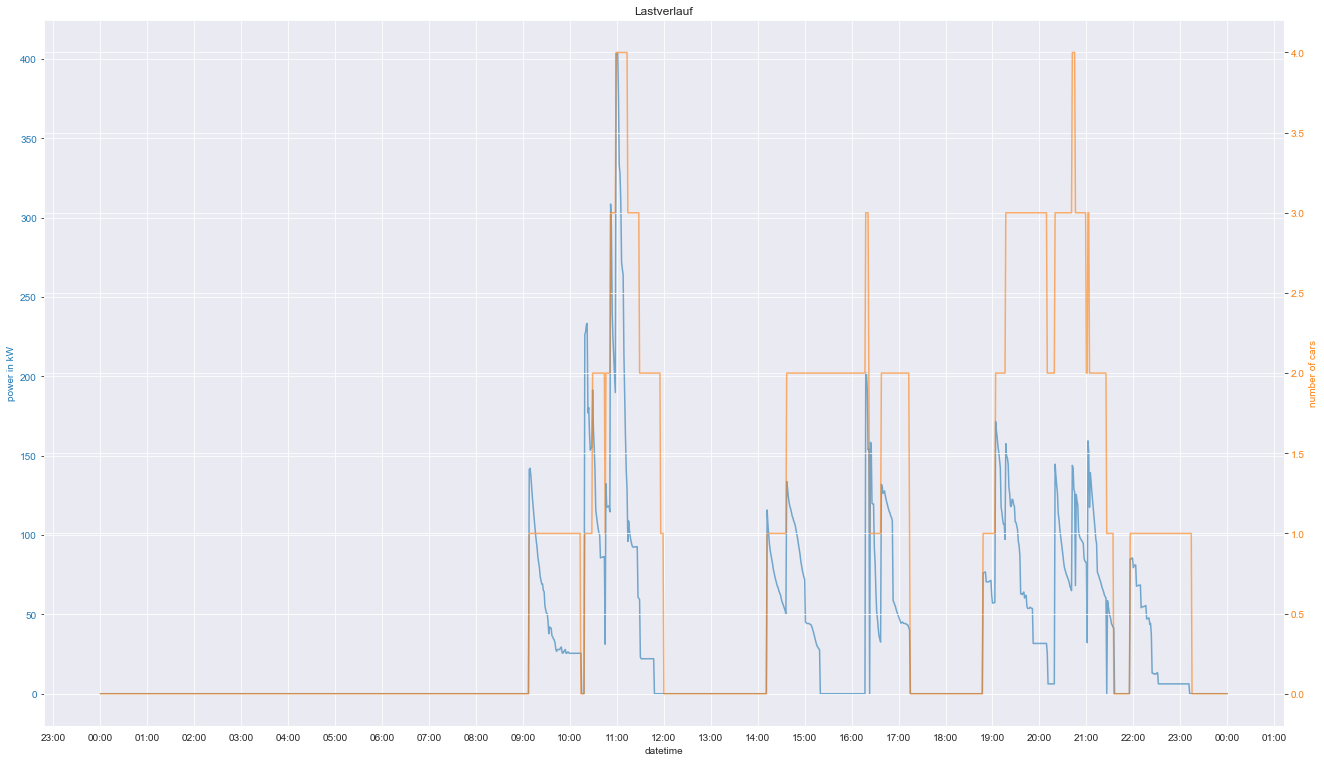

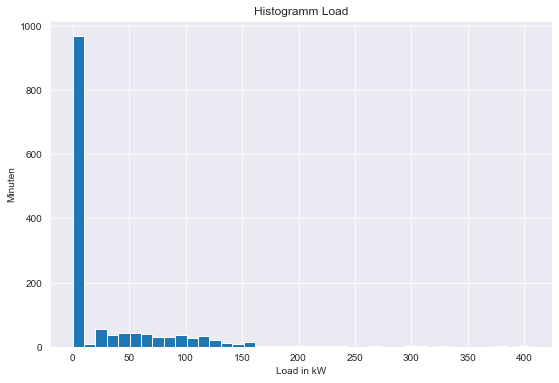

In [7]:
import model_final
importlib.reload(model_final)
df_results, anzahl_evs, anzahl_evs_abgewiesen = model_final.simulation("settings_final.json")
model_final.auswertung(df_results)
model_final.plot(df_results)